# Dataset exploration

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({'font.size':25})
%matplotlib inline

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D4D9-A6BE

 Directory of C:\Users\Ryan Abrahams\Desktop\hackathon\ImpactHack-migration\Datasets

09/21/2018  11:20 PM    <DIR>          .
09/21/2018  11:20 PM    <DIR>          ..
09/21/2018  11:20 PM    <DIR>          .ipynb_checkpoints
09/21/2018  11:16 PM            21,596 Asylum_Country_Origin_00_17.csv
09/21/2018  11:16 PM         3,905,549 COO_v_COD_90_14.csv
09/21/2018  11:16 PM           104,232 Empl_Ag_91_17.csv
09/21/2018  11:16 PM         1,237,586 Floods_Drought_2014.xlsx
09/21/2018  11:16 PM            29,377 GINI_90_17.csv
09/21/2018  11:16 PM             9,865 Hunger_Index_90_16.csv
09/21/2018  11:16 PM            75,526 Pop_90_17.csv
09/21/2018  11:20 PM                72 Untitled.ipynb
               8 File(s)      5,383,803 bytes
               3 Dir(s)  459,856,023,552 bytes free


# Asylym data

In [4]:
asylum = pd.read_csv("Asylum_Country_Origin_00_17.csv")

In [5]:
asylum.head()

,yr_2007,cartodb_id,name,country_or,yr_2000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,...,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017
0,3609746.0,1,Afghanistan,Afghanistan,4778785.0,5166652.0,6013458.0,3174558.0,3598240.0,3192177.0,...,3374020.0,3280950.0,4404457.0,4250315.0,4132670.0,3600396.0,3713242.0,4434901.0,5166125.0,5336564.0
1,198970.0,2,Angola,Angola,705464.0,695600.0,736745.0,474278.0,328645.0,277950.0,...,185186.0,158649.0,136078.0,133414.0,136546.0,110198.0,89743.0,54755.0,33135.0,33831.0
2,16982.0,3,Albania,Albania,9620.0,11604.0,15756.0,14920.0,13806.0,15301.0,...,16828.0,17303.0,16166.0,16367.0,24512.0,28324.0,25370.0,52571.0,34853.0,30918.0
3,12.0,4,Andorra,Andorra,3.0,8.0,13.0,13.0,7.0,12.0,...,9.0,8.0,8.0,6.0,7.0,5.0,7.0,9.0,6.0,NaN
4,318.0,5,United Arab Emirates,United Arab Emirates,25.0,49.0,69.0,45.0,82.0,46.0,...,267.0,440.0,453.0,500.0,608.0,156.0,170.0,204.0,277.0,325.0


In [6]:
yr_keys = ["yr_"]*18
for i in range(len(yr_keys)):
    yr_keys[i] = yr_keys[i] + str(2000+i)
    
print(yr_keys)

['yr_2000', 'yr_2001', 'yr_2002', 'yr_2003', 'yr_2004', 'yr_2005', 'yr_2006', 'yr_2007', 'yr_2008', 'yr_2009', 'yr_2010', 'yr_2011', 'yr_2012', 'yr_2013', 'yr_2014', 'yr_2015', 'yr_2016', 'yr_2017']


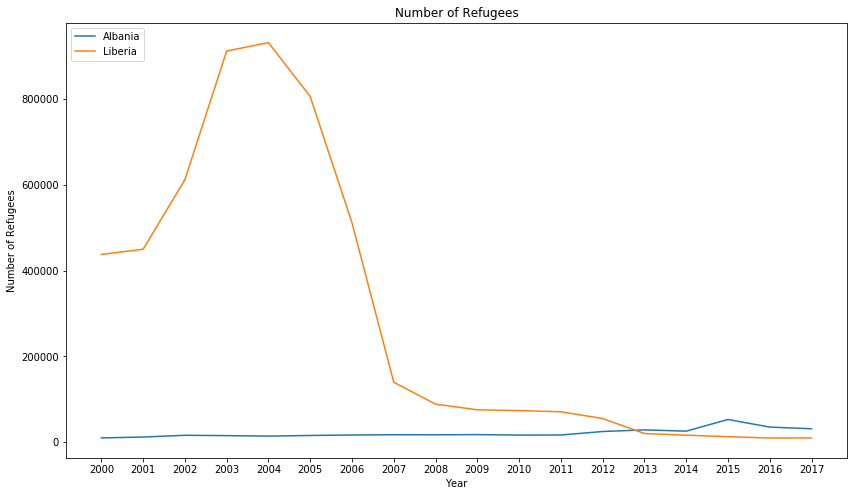

In [39]:
# albania
albania_number = asylum.loc[2,yr_keys]
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(albania_number, label="Albania")
ax.set_xticklabels(list(map(lambda x: x.split("_")[1],yr_keys)))

ax.plot(asylum.loc[97,yr_keys], label="Liberia")

ax.legend(loc=2)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Refugees")
ax.set_title("Number of Refugees")
fig.savefig("NumberOfRefugees.png")

In [36]:
asylum.loc[90:100,'name']

90                  Cambodia
91                  Kiribati
92     Saint Kitts and Nevis
93               South Korea
94                    Kuwait
95                      Laos
96                   Lebanon
97                   Liberia
98                     Libya
99               Saint Lucia
100            Liechtenstein
Name: name, dtype: object

# COO_v_COD_90_14.csv

In [44]:
file = "COO_v_COD_90_14.csv"
dat = [line.split(",") for line in open(file)]

In [47]:
header = dat[0]
data = dat[1:]